<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"><b>The Traveling Salesman Problem</b></span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://mate.unipv.it/gualandi" property="cc:attributionName" rel="cc:attributionURL">Stefano Gualandi</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/mathcoding/opt4ds" rel="dct:source">https://github.com/mathcoding/opt4ds</a>.

# 4. The Traveling Salesman Problem
In this notebook, we show how to solve the *Ticket Student Selling Problem* (known in the academic literature as the **Traveling Sales Problem (TSP)**) by using Integer Linear Programming.

For a nice source of nice information about the TSP problem, please, visit the [TSP webiste](http://www.math.uwaterloo.ca/tsp/)

The following lines are for running this notebook in a COLAB:

In [ ]:
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("glpk") or os.path.isfile("glpk")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge glpk 
        except:
            pass

## 4.1 Introduction
A student from the University of Pavia must sell the tickets for the next post-Covid19 re-opening party, planned on March, 1st, 2021. For this reason, she must visit all the $n$ residences of the city exactly once, and then she has to return back to her own residence.

The time taken to go from residence $i$ to residence $j$ is $c_{ij}$, and the visiting time is fixed for each residence. The student wants to find the order which permits to be back as soon as possible, in order to study for the next very challenging exam on Optimization Models and Algorithms.

The input data are: 

* The number of residences $n$ in Pavia, with a mapping of residence to indices $I=\{1,\dots,n\}$.
* The cost matrix $C$ with all the pairwise distances between the residences.

## 4.2 Primal Heuristic
Any permutation of the $n$ residence represents a feasible solution.

The residence locations are given as a list of pair of coordinates:

```
Ls = [(38.24, 20.42), (39.57, 26.15), (40.56, 25.32), (36.26, 23.12),
           (33.48, 10.54), (37.56, 12.19), (38.42, 13.11), (37.52, 20.44),
           (41.23, 9.10), (41.17, 13.05), (36.08, -5.21), (38.47, 15.13), 
           (38.15, 15.35), (37.51, 15.17), (35.49, 14.32), (39.36, 19.56)]
```

The cost matrix can be computed with the following function:

In [33]:
import numpy as np
from math import sqrt

def CostMatrix(Ls):
    n = len(Ls)
    C = 100000*np.ones((n,n)) # Very high cost to forbid stay trapped in a residence
    for i, (a,b) in enumerate(Ls):
        for j, (c,d) in enumerate(Ls[i+1:]):
            C[i, i+j+1] = sqrt((a-c)**2 + (b-d)**2)
            C[i+j+1, i] = C[i, i+j+1]
            
    return C

In [34]:
Ls = [(38.24, 20.42), (39.57, 26.15), (40.56, 25.32), (36.26, 23.12),
           (33.48, 10.54), (37.56, 12.19), (38.42, 13.11), (37.52, 20.44),
           (41.23, 9.10), (41.17, 13.05), (36.08, -5.21), (38.47, 15.13), 
           (38.15, 15.35), (37.51, 15.17), (35.49, 14.32), (39.36, 19.56)]

C = CostMatrix(Ls)

Any permutation is a feasible solution (likely, far from being optimal):

In [35]:
tour = [(i,i+1) for i in range(len(Ls)-1)]
# From the last residence back to the first one
tour = tour + [(tour[-1][1],tour[0][0])]

In [39]:
tour

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 0)]

**EXERCISE 1:** Write a function to compute the cost of a given tour.

## 4.2 Plotting Solutions
If the points can be displayed in a plane, we can use matplotlib to represent a (partial) solution of our problem

In [27]:
def PlotTour(Ps, Ls):
    # Report solution value
    import matplotlib.pyplot as plt
    import numpy as np
    import pylab as pl
    from matplotlib import collections  as mc

    lines = [[Ps[i], Ps[j]] for i,j in Ls]

    lc = mc.LineCollection(lines, linewidths=2)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

To plot a solution as a list of sequential pairs:

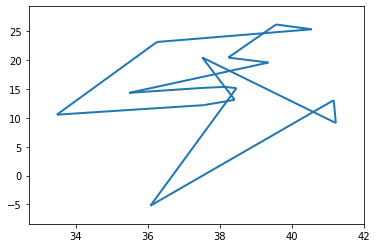

In [32]:
PlotTour(Ls, tour)

**QUESTION:** How far we are from the optimum value?

## 4.3 Integer Linear Programming Model
For each ordered pair $(i,j) \in I \times I, i \neq j$, we introduce a binary decision variable $x_{ij} \in \{0,1\}$, which indicates if the student travels from residence $i$ to $j$.

**EXERCISE 2:** Write a possible ILP model to solve this problem

In [41]:
# Complete the following code
def SolveTSP(C):
    pass

**EXERCISE 3:** Debug your ILP model, please!

**EXERCISE 4:** Improve your model to provide a tighter LP relaxation at the root node.

## 4.4 Larger Instances
Once you have find a model that correctly solves the given TSP instance, try to solve the following larger instance, which contains the coordinates of a number of villages in Baviera.

In [37]:
BAVIERA = [(1150.0,  1760.0), (630.0,  1660.0),  (40.0,  2090.0),    (750.0,  1100.0), 
  (1030.0,  2070.0), (1650.0,   650.0), (1490.0,  1630.0),  (790.0,  2260.0),
  (710.0,  1310.0),  (840.0,   550.0),  (1170.0,  2300.0),  (970.0,  1340.0),
  (510.0,   700.0),  (750.0,   900.0),  (1280.0,  1200.0),  (230.0,   590.0),
  (460.0,   860.0),  (1040.0,   950.0), (590.0,  1390.0),   (830.0,  1770.0),
  (490.0,   500.0),  (1840.0,  1240.0), (1260.0,  1500.0),  (1280.0,  790.0),
  (490.0,  2130.0),  (1460.0,  1420.0), (1260.0,  1910.0),  (360.0,  1980.0),
  (750.0,  2030.0)]   

If you can solve also this instance in a few seconds, then you can try to evaluate how your model scale with an increasing number of cities, by using the following random instance generator:

In [38]:
def RandomTSP(n):
    from numpy import random
    return [(x,y) for x,y in zip(random.random(n), random.random(n))]

for n in [50, 75, 100, 150, 200]:
    Ls = RandomTSP(100)
    # solve tsp with your model